C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


   Player Experience  Average Reaction Time  Game Duration (mins)  \
0                  7               0.532820             24.783082   
1                  4               1.143924             23.802185   
2                  8               0.970852             94.620726   
3                  5               0.332876             85.903553   
4                  7               1.394376            100.213056   

   Strategy Complexity  Opponent Difficulty  Game Score  Cluster  
0                    5             2.271012  108.668982        1  
1                    1             6.137897   21.698018        1  
2                    2             2.667433  107.682376        2  
3                    3             3.507788   87.796462        2  
4                    2             2.968388   99.326216        2  


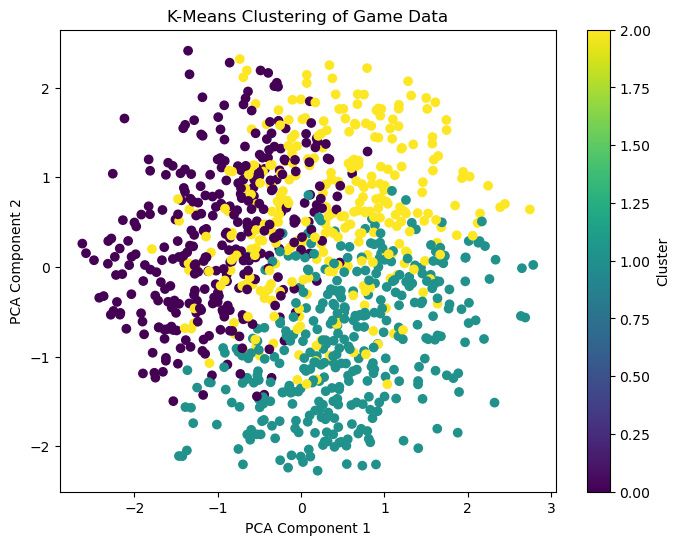

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate data (same as in the original code)
num_samples = 1000

player_experience = np.random.randint(1, 11, num_samples)
average_reaction_time = np.random.uniform(0.2, 1.5, num_samples)
game_duration = np.random.uniform(20, 120, num_samples)
strategy_complexity = np.random.randint(1, 6, num_samples)
opponent_difficulty = np.random.uniform(1, 10, num_samples)

noise = np.random.normal(0, 5, num_samples)
game_score = (
    10 * player_experience - 
    5 * average_reaction_time + 
    0.3 * game_duration + 
    8 * strategy_complexity - 
    4 * opponent_difficulty + 
    noise
)

game_score = np.maximum(game_score, 0)

data = pd.DataFrame({
    "Player Experience": player_experience,
    "Average Reaction Time": average_reaction_time,
    "Game Duration (mins)": game_duration,
    "Strategy Complexity": strategy_complexity,
    "Opponent Difficulty": opponent_difficulty,
    "Game Score": game_score
})

# Prepare features for clustering
features = data[["Player Experience", "Average Reaction Time", "Game Duration (mins)", "Strategy Complexity", "Opponent Difficulty"]]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choosing 3 clusters as an example
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Displaying the first few rows of the dataframe with the cluster labels
print(data.head())

# Optional: Visualize clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.title("K-Means Clustering of Game Data")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
